# Monte Carlo Simulation of a call option (using Euler Discretization)

We will here compute the price of a Call Option on an underlying stock

Import Packages:

In [21]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

Chose the desired stock and import its data history (we will use IBM): 

In [58]:
ticker = 'IBM'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-01-01', end = '2020-01-02')['Adj Close']

Estimate the log-returns:

In [59]:
log_returns = np.log(1+data.pct_change())

Assign variable values:

In [82]:
#risk-free interest rate
r = 0.025

#standard deviation of log-returns (turned into an array)
sigma = log_returns.std()*252**0.5
sigma = sigma.values

#time horizon (252 trading days in a year)
T = 1.0
t_intervals = 252
delta_t = T / t_intervals

# numer of simulations of the random component
iterations = 10000

Random component Z (drawn from a standard normal distribution):

In [83]:
#normal distribution
Z = np.random.standard_normal((t_intervals + 1, iterations))

#empty array with S of same dimension as Z
S = np.zeros_like(Z)

#fill first row with the last available stock price
S0 = data.iloc[-1]
S[0] = S0

Create stock price matrix:

In [84]:
for t in range(1, t_intervals+1):
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * delta_t + sigma * delta_t**0.5 * Z[t])

plot the potential tracks (limiting the graph to the first 50 iterations):

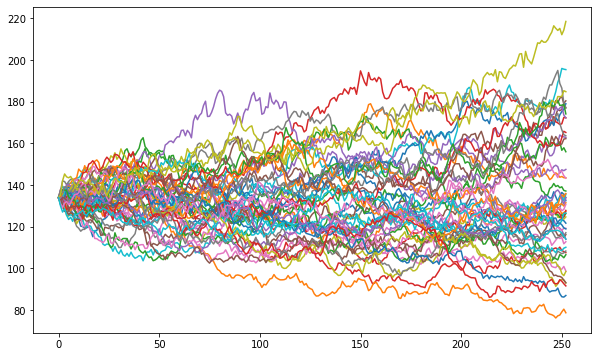

In [85]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :50]);

Calculate the Call price:

In [86]:
#strike price
K = 120

In [87]:
payoff_function = np.maximum(S[-1] - K, 0)

In [89]:
#discount the average of the payoff
C = np.exp(-r * T) * np.sum(payoff_function) / iterations
C

21.674074781347674